Observing the distribution of our classes

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
# Load the dataset
data = pd.read_csv("/Users/srivenikunduru/Downloads/AIProject/creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
classes=data['Class'].value_counts()
normal_share=round(classes[0]/data['Class'].count()*100,2)
fraud_share=round(classes[1]/data['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


In [5]:
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

 Normal_share= 99.82725143693798 
 Fraud_share= 0.1727485630620034
 Imbalance Percentage = 0.173047500131896


The code below creates a figure that displays two subplots side by side, 
with the left subplot showing the number of transactions in each class (0 or 1) 
and the right subplot showing the percentage of transactions in each clas

<Figure size 2000x600 with 0 Axes>

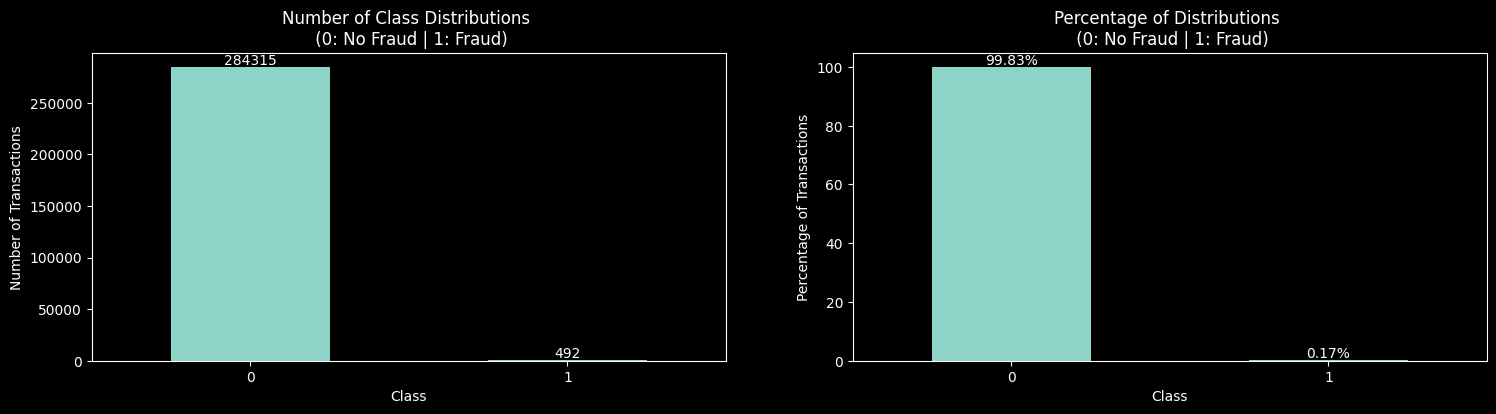

In [7]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of Class Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('Class')
    
    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/data['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('Class')
    
    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

Creates a scatter plot of Time vs Class with color-coded points and a legend.

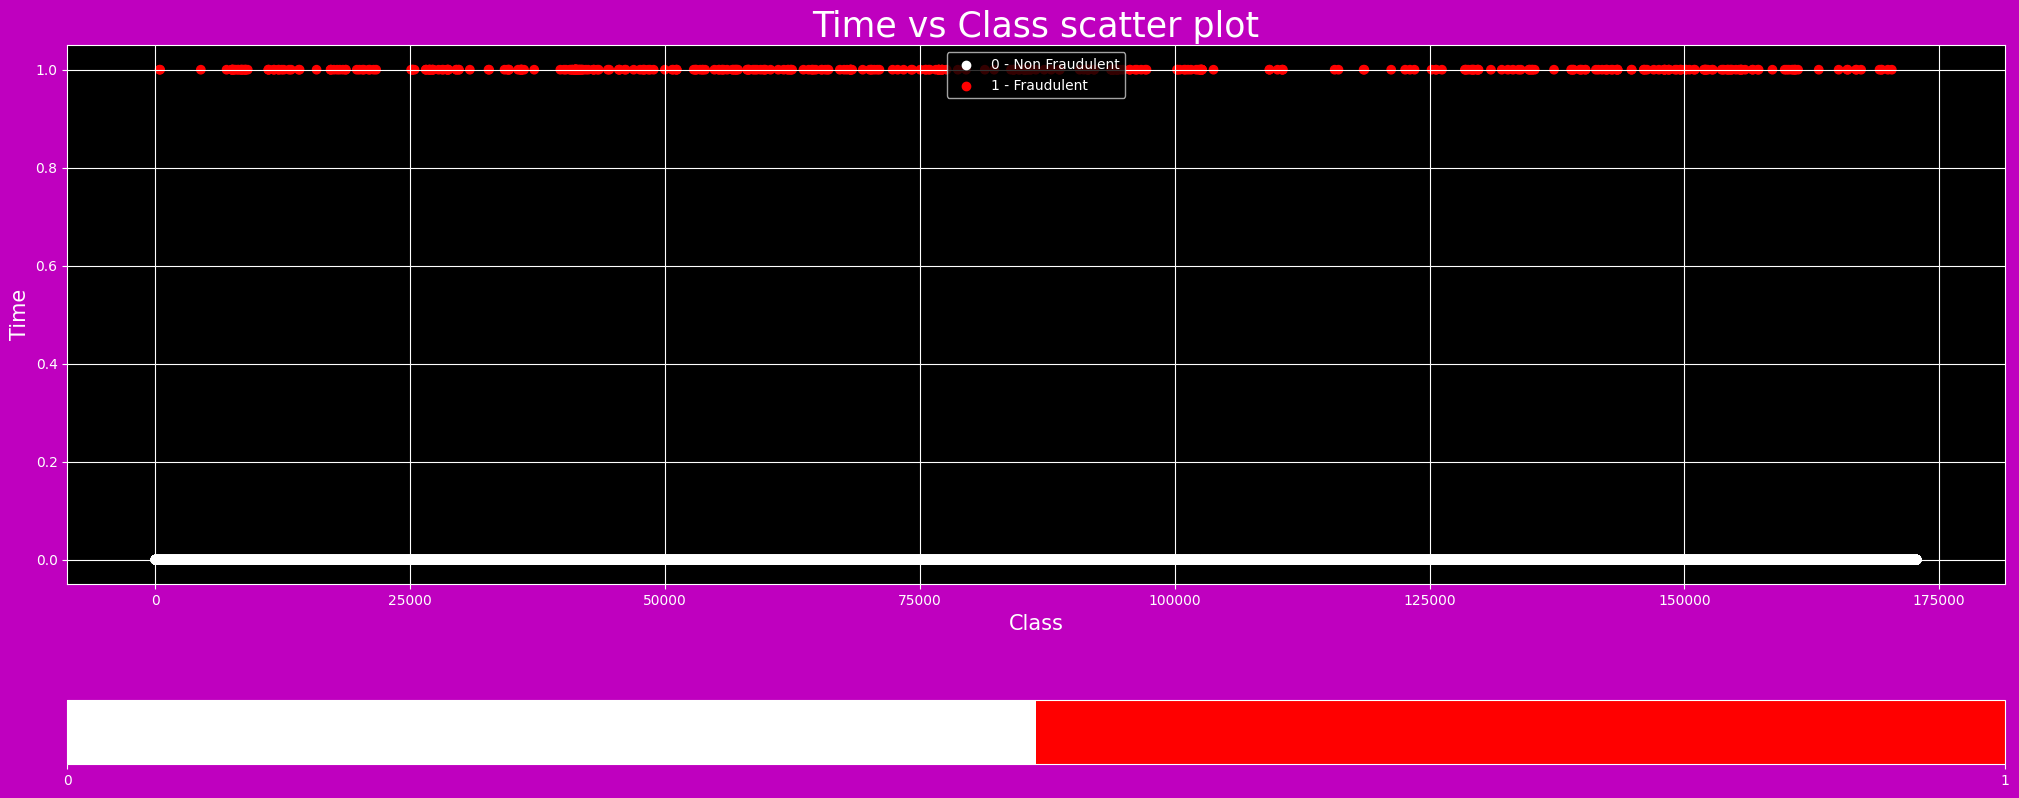

In [9]:

import matplotlib.pyplot as plt
from matplotlib import colors  # Importing the colors module


cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(25,10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=data["Time"], y=data["Class"], c=data["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Time vs Class scatter plot", fontsize=25)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

Creates a scatter plot of Amount vs Class with color-coded points and a legend.

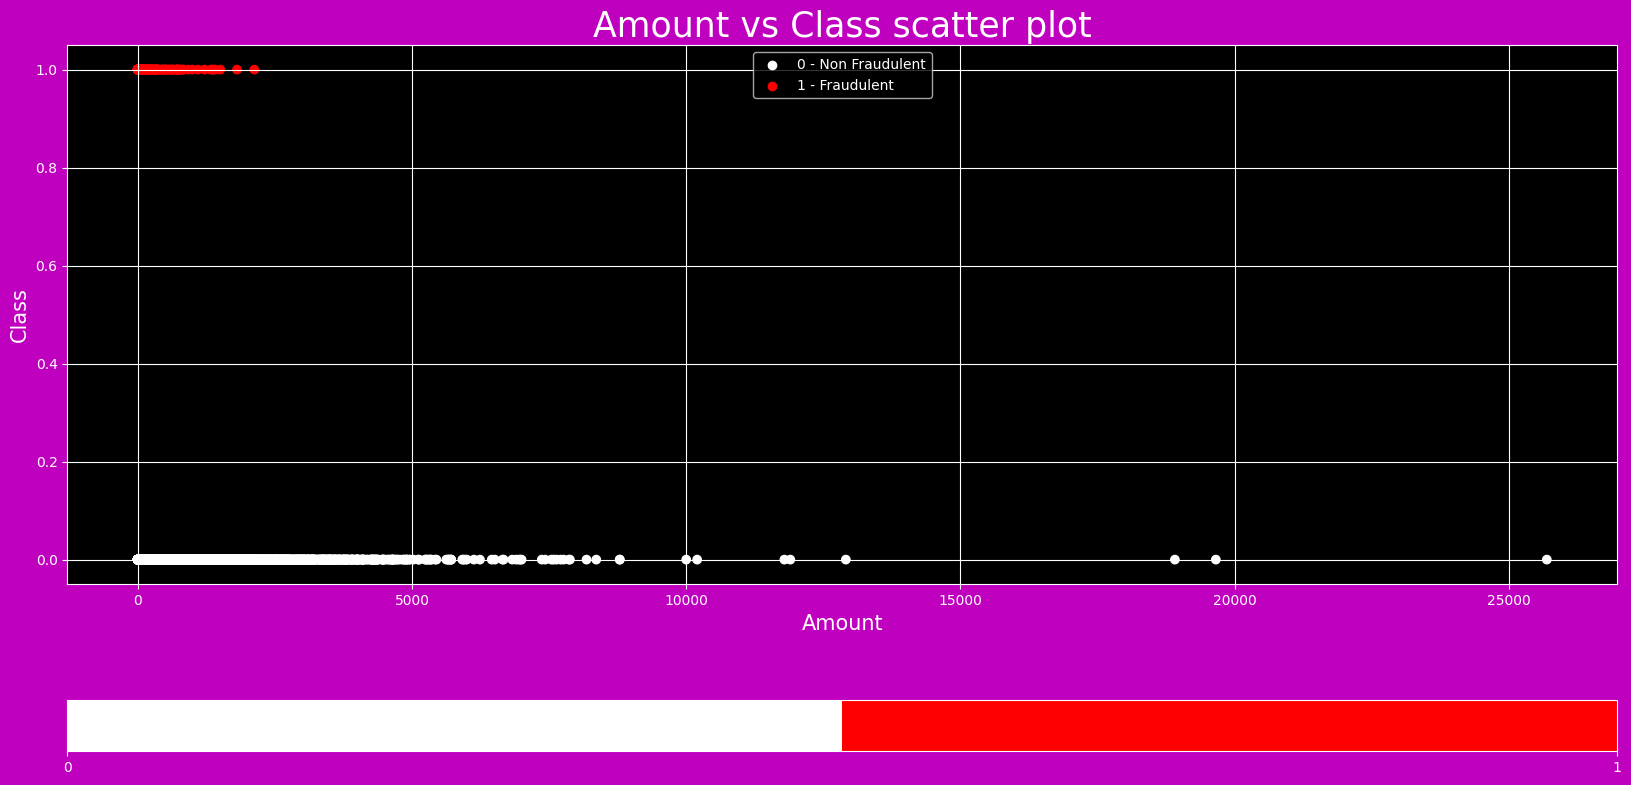

In [10]:
cmap = colors.ListedColormap(['white', 'red'])

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10), facecolor='m')

    # Use the cmap parameter to color-code the points
    plt.scatter(x=data["Amount"], y=data["Class"], c=data["Class"], cmap=cmap)

    # Set the limits of the colorbar
    plt.colorbar(ticks=[0, 1], orientation='horizontal', aspect=30, pad = 0.15)

    plt.title("Amount vs Class scatter plot", fontsize=25)
    plt.ylabel("Class", fontsize=15)
    plt.xlabel("Amount", fontsize=15)
    plt.grid()

    # Create a legend with the two class labels
    legend_elements = [plt.scatter([],[], marker='o', color='white', label='0 - Non Fraudulent'),
                       plt.scatter([],[], marker='o', color='red', label='1 - Fraudulent')]
    plt.legend(handles=legend_elements, loc='upper center')

    plt.show()

Visualize the distribution of variables in a DataFrame using density plots.

<Figure size 1400x800 with 0 Axes>

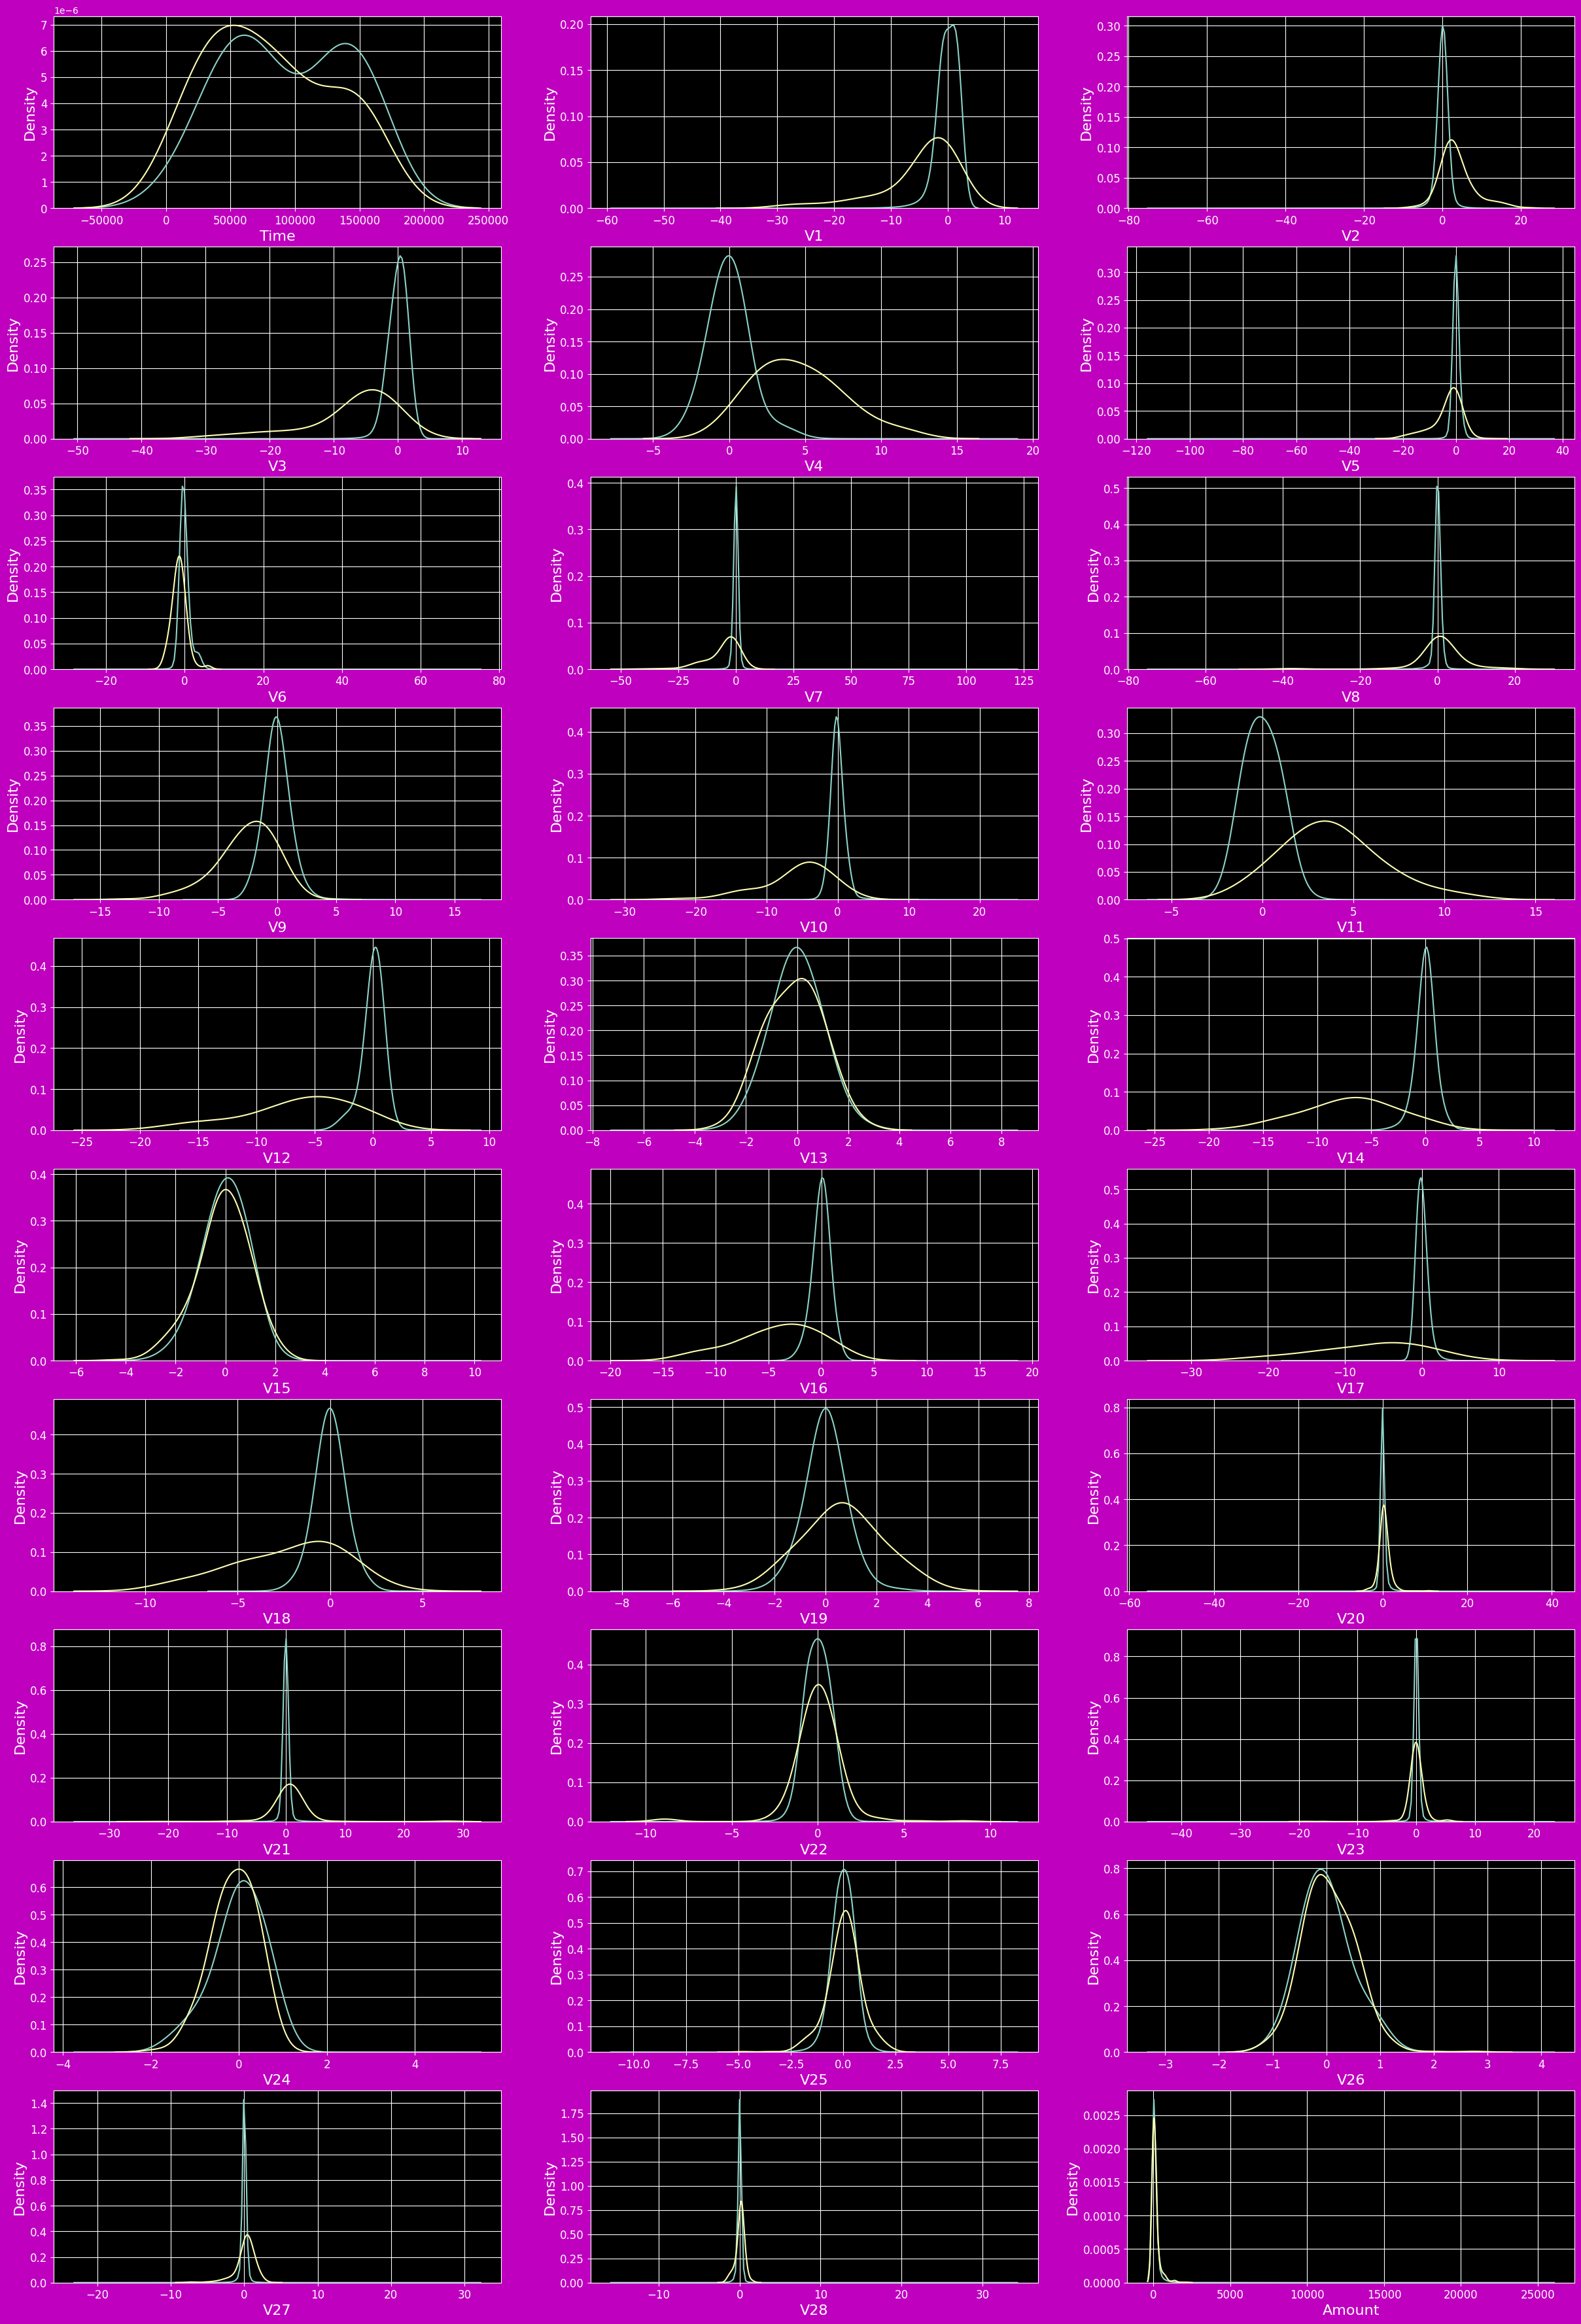

In [13]:
import seaborn as sns
# Plotting all the variable in displot to visualise the distribution
var = list(data.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw_method=0.5,label="0")
        sns.kdeplot(t1[feature], bw_method=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()